<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 4
## Síntesis de filtro pasa-altos
### Jorge Andres Niño


A partir de la plantilla presentada para un filtro pasa-altos, obtener la respuesta en frecuencia y la fase, el diagrama de polos y ceros y el retardo, empleando la trasnformación en frecuencia, sintetizar el circuito mediante estrcturas pasivas y activar el inductor mediante un GIC..

![*Figura 1*](TS4_problema.png)

## Síntesis de la función transferencia y circuito normalizado.

Se presenta la síntesis de la función transferencia a partir de la función de maxima planicidad, que se usa como butterworth pero calculando la $ \omega_B$ para un filtro pasa-altos. Al llegar al polinomio final de orden 3, se aplica el nucleo de transformación, y luego se sintetiza el circuito, al calcular los valores de los componentes se emplea la $ \omega_B = \epsilon^{1/n}$

In [11]:
from IPython.display import IFrame, display
IFrame("./TS4_res.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [1]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_bicuad_omegayq

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt


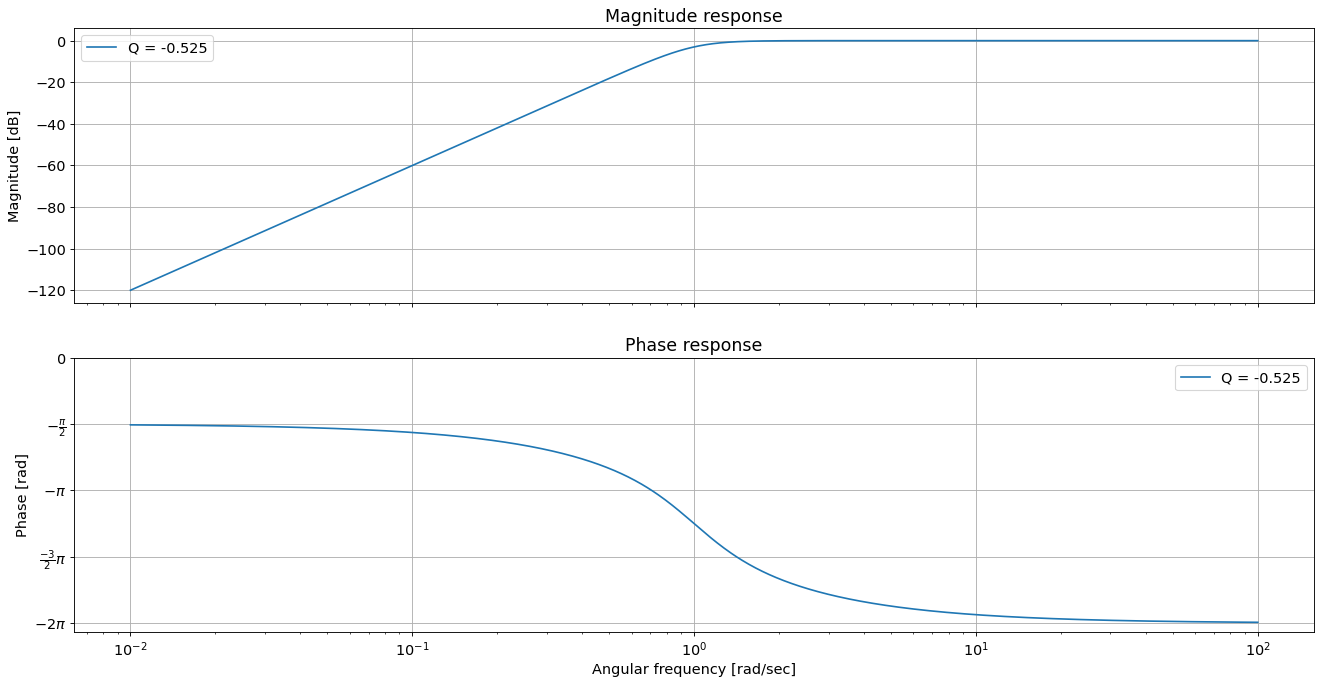

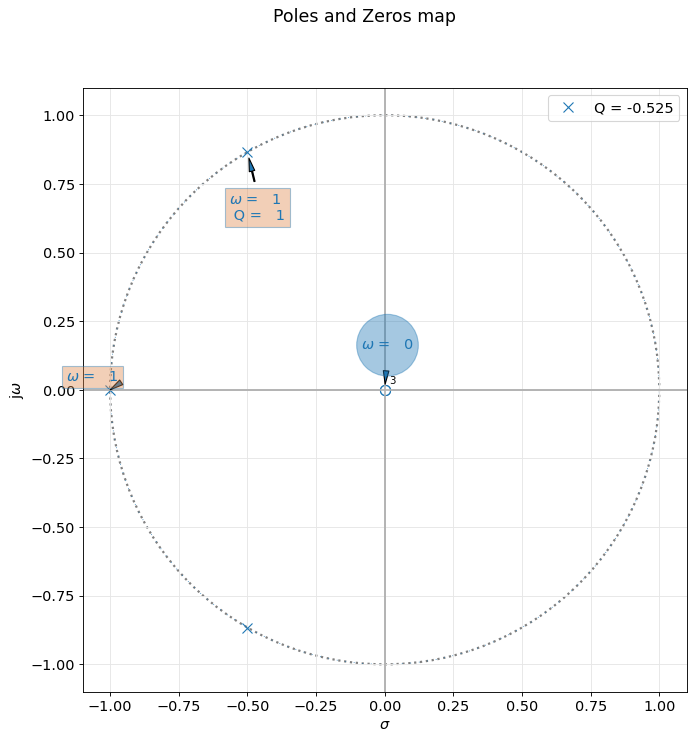

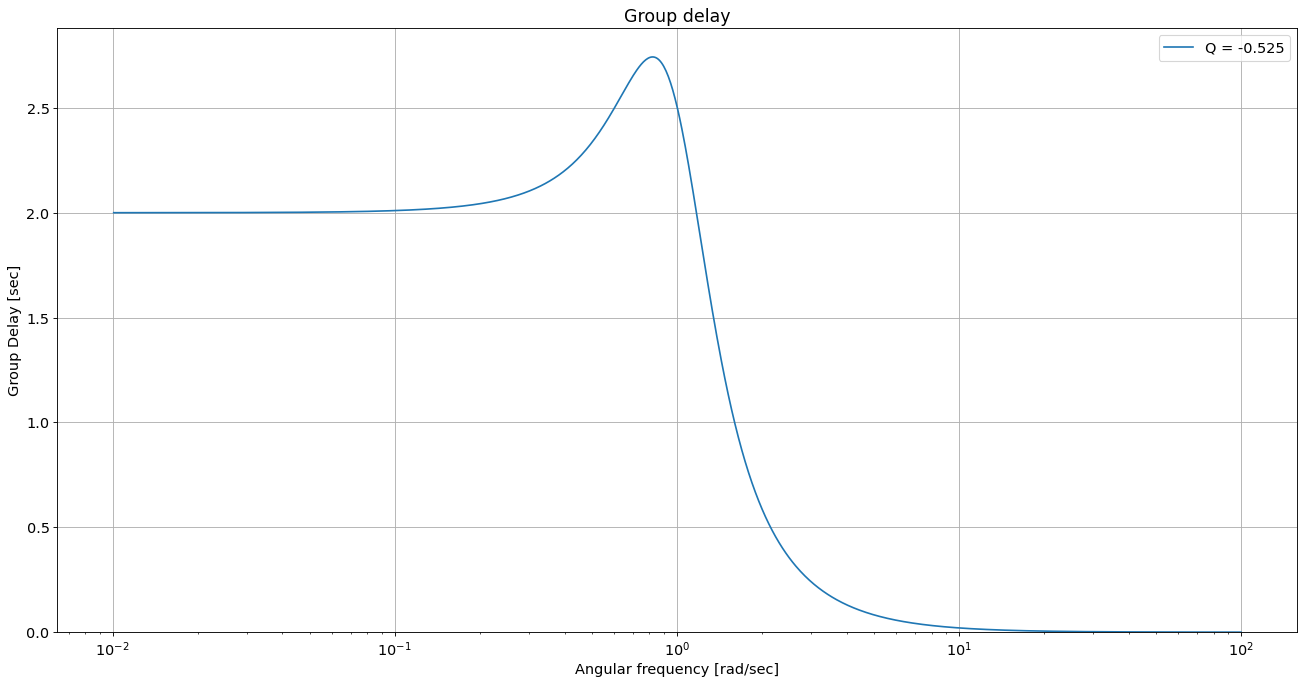

In [3]:
#%% Funcion trasnferencia:
ep= np.sqrt(0.258)
w0 = 1
Q = 1/(2*np.cos(60))
num1= np.array([w0**4,0,0,0])
den1 = np.array([w0**3, 2*w0**2, 2*w0, 1])
H1 = Funcion.TransferFunction( num1, den1 )
fig_sz_x = 20
fig_sz_y = 10
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
#_, axes_hdl = bodePlot(H1)
# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
#plt.sca(axes_hdl[0])
#plt.ylim([-40,10])
#plt.gca
#pzmap(H1)
#plt.rcParams['figure.figsize'] = (30,30)
#plt.show()
analyze_sys(H1, sys_name='Q = {:3.3f}'.format(Q))

Simulamos el sistema con los valores calculados en el apartado del PDF, y luego aplicamos la trasnformación en frecuencia y en impedancia para obtener las respuestas deseadas en LTSPICE:

![*Figura 6*](LTCIR.png)

![*Figura 7*](LTSIM.png)

En la figura de la respuesta en frecuencia podemos observar que el primer cursor nos señala $-0.999 db$ a $1.001 Hz$ con lo cual podemos decir que cumplimos con esa parte de la plantilla. Luego en $f= 2*f_0$, con el segundo cursor obtenemos una atenuaicion de $12.42 db$, que es casi exacto el valor obtenido en la síntesis empleando las formulas de maxima planicidad para un filtro de orden 3. Solo nos queda desnormalizar a $f_0 = 1.5 KHz$ y a una impedancia razonable y deberiamos obtener la respuesta requerida.

## Normalización a $f_0$

A continuación, podemos simplemente normalizar los componentes del circuito a nuestra $f_0$ considerando que $f_0 = 1500 Hz$. Por tanto usamos las normalizaciones:
$$L = \frac{L \cdot Zn}{f_0}$$
$$C = \frac{C}{f_0\cdot Zn}$$
Tomando $Zn = 1K\Omega$ obtenemos:
$$C = 106 nF$$
$$L = 67 \mu H$$
$$R = 796 \Omega$$

Para R1 y C1 obtenemos:
$$R1 = 796 \Omega$$
$$C1 = 84.6 nF$$

## Simulación en LTSPICE ##

A continuación se realizaron las simulaciones en LTSPICE, reemplazando mediante parametrización( como se observa mas abajo en el circuito) para así poder darle mas flexibilidad al sistema. A continuación se ve el circuito parametrizado:

![*Figura 6*](LTNORMCIR.png)

La simulación se hara haciendo foco sobre la banda $100-15000 Hz$ obteniendo los siguientes resultados:

![*Figura 6*](LTNORMSIM.png)

Como podemos observar hemos podido cumplir con la plantilla inicial al tener una atenuación de aproximadamente $1 db$ a frecuencia de $1.5 KHz$ y una caida de mas de $12 db$ a $3 KHz$

## Calculo y simulación con capacitores fijos

Volvemos a calcular la red anteriormente dimensionada pero fijando los capacitores en 100nf. De igual manera, reemplazamos el circuito RLC mediante el uso de un FDNR, para lo cual recalculamos los componentes del filtro de segundo orden.

In [1]:
from IPython.display import IFrame, display
IFrame("./tarea_p4y5.pdf", width=1000, height=1000)

### Simulaciones

Vemos a continuación las simulaciones para Capacitores fijos en $100 nf$.

![*Figura 8*](LTCIR2100N.png)

![*Figura 6*](LTCIR100N.png)

Como observamos pudimos obtener una respuesta que cumple con la plantilla requerida.
A continaución observamos la simulación con componentes desnormalizados para el FDNR implementado con amplificadores operacionales.

![*Figura 8*](FDNRCIR.png)

![*Figura 9*](FDNRSIM.png)

Obtuvimos la misma respuesta, pero sin emplear inductores, activando el circuito

# Conclusiones:
 

* Pudimos verificar que obtenemos los mismos resultados a partir de despejar el polinomio de la función transferencia de maxima planicidad que tratando el circuito como un filtro Butterworth y luego desnormalizando para la $\omega_b$ calculada para el sistema en base a $\epsilon$ y el n del filtro
* Se pudo verificar tanto numerica como circuitalmente la utilidad de obtener la función matematica adecuada pues facilita mucho el diseño de circuitos. También pudimos verificar la ubicación de los polos por fuera del circulo unitario para maxima planicidad.
* Fijando uno de los componentes se puede renormalizar la red para tener la misma respuesta pero logrando que la sensibilidad de los parametros de la red, quede menos dependiente de componentes con mayores tolerancias y por tanto mas suceptibles de introducir desviaciones.
* Mediante la activación de componentes, podemos construir redes de estrcutura similar a las redes pasivas pero evitando tener que construir inductancias, que son mas suceptibles a problemas constructivos, así como son dificiles de integrar. Las redes constituidas de AOP, resistores y capacitores son mucho mas faciles de integrar.